In [57]:
from dask import dataframe
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
big_df = dataframe.read_csv("data/rt_leavetimes_DB_2018.txt", sep = ";")

In [26]:
big_df["STOPPOINTID"].nunique().compute()

4774

There are 4774 bus stops in this dataset. The dataset includes routes that are now hosted by go ahead ireland and dublin bus so might be an issue.

In [27]:
big_df.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,01-JAN-18 00:00:00,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
1,DB,01-JAN-18 00:00:00,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
2,DB,01-JAN-18 00:00:00,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
3,DB,01-JAN-18 00:00:00,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
4,DB,01-JAN-18 00:00:00,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN


# if we use the first stop in the list

In [28]:
stop_119_df = big_df[big_df["STOPPOINTID"] == 119]

In [65]:
stop_119_pd_df = stop_119_df.compute()
stop_119_pd_df = stop_119_pd_df.reset_index(drop = True)

In [66]:
stop_119_pd_df.shape

(104165, 18)

In [67]:
stop_119_pd_df.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,01-JAN-18 00:00:00,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
1,DB,01-JAN-18 00:00:00,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
2,DB,01-JAN-18 00:00:00,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
3,DB,01-JAN-18 00:00:00,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
4,DB,01-JAN-18 00:00:00,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN


In [68]:
stop_119_pd_df = stop_119_pd_df.drop(["PASSENGERS", "PASSENGERSIN", "PASSENGERSOUT", "DISTANCE", "NOTE"], axis = 1)

In [69]:
stop_119_pd_df.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE
0,DB,01-JAN-18 00:00:00,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,08-JAN-18 17:21:10
1,DB,01-JAN-18 00:00:00,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,08-JAN-18 17:21:10
2,DB,01-JAN-18 00:00:00,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,08-JAN-18 17:21:10
3,DB,01-JAN-18 00:00:00,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,08-JAN-18 17:21:10
4,DB,01-JAN-18 00:00:00,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,08-JAN-18 17:21:10


In [70]:
stop_119_pd_df["DAYOFSERVICE"] = pd.to_datetime(stop_119_pd_df["DAYOFSERVICE"])
stop_119_pd_df["LASTUPDATE"] = pd.to_datetime(stop_119_pd_df["LASTUPDATE"])

# categorical things
stop_119_pd_df["TRIPID"] = stop_119_pd_df["TRIPID"].astype("category")
stop_119_pd_df["VEHICLEID"] = stop_119_pd_df["VEHICLEID"].astype("category")
stop_119_pd_df["SUPPRESSED"] = stop_119_pd_df["SUPPRESSED"].astype("category")
stop_119_pd_df["STOPPOINTID"] = stop_119_pd_df["STOPPOINTID"].astype("category")

In [71]:
stop_119_pd_df.index

RangeIndex(start=0, stop=104165, step=1)

In [72]:
# we need to merge the data for the route and the weather data
#merge with respect to the time, and eazch hour
# for example, 1:30 should be emrged with the data for 1:00 as weather
# is on hourly basis

# CREATE  a new feature in the routes that contains the hours so that we can 
# merge with the weather data
route_time_planned = stop_119_pd_df["PLANNEDTIME_ARR"]
route_time_actual = stop_119_pd_df["ACTUALTIME_ARR"]

actual_time_hour = []
expected_time_hour = []
for i in range(len(route_time_actual)):
    actual_time_hour.append(route_time_actual[i] // 3600)
    expected_time_hour.append(route_time_planned[i] // 3600)

actual_date = stop_119_pd_df["DAYOFSERVICE"]

# parse it into datetime with this  any hours
date_time = []
for i in range(len(actual_time_hour)):
    new_datetime = actual_date[i] + timedelta(hours = int(actual_time_hour[i]))
    date_time.append(new_datetime)
    
# add in the new column, 
# new column means that we can remove the other date column
stop_119_pd_df["date_and_time"] = date_time

stop_119_pd_df["delay_amount"] = stop_119_pd_df["ACTUALTIME_ARR"] - stop_119_pd_df["PLANNEDTIME_ARR"]

#combined_df["planned_hour_arr"]
hours = stop_119_pd_df["PLANNEDTIME_ARR"]//3600
#combined_df["planned_minute_arr"]

minutes= (stop_119_pd_df["PLANNEDTIME_ARR"]%3600) // 60

stop_119_pd_df["planned_arr_hours"] = hours
stop_119_pd_df["planned_arr_minutes"] = minutes
# get the day of the week form the 
stop_119_pd_df["day_of_week"] = stop_119_pd_df["DAYOFSERVICE"].dt.day_name()

In [73]:
def holiday(df):
    holiday = [6,7,8, 12]
    if df["DAYOFSERVICE"].month in holiday:
        return 1
    elif df["DAYOFSERVICE"].month == 3 and df["DAYOFSERVICE"].day == 17:
        return 1
    elif df["DAYOFSERVICE"].month == 1 and df["DAYOFSERVICE"].day == 1:
        return 1
    elif df["DAYOFSERVICE"].month == 5 and df["DAYOFSERVICE"].day == 1:
        return 1
    else:
        return 0
    
stop_119_pd_df["holiday"] = stop_119_pd_df.apply(holiday, axis = 1)

In [74]:
def seconds_to_time(n):
    return timedelta(seconds=n)
stop_119_pd_df[ "datetime_exact"] = stop_119_pd_df["DAYOFSERVICE"] + pd.Series(map(seconds_to_time, stop_119_pd_df["PLANNEDTIME_ARR"]), name="time")

In [75]:
trips_df = dataframe.read_csv("data/rt_trips_DB_2018.txt", sep = ";")
trips_direction_df = trips_df[["TRIPID", "DIRECTION"]].compute()
stop_119_pd_df = pd.merge(stop_119_pd_df ,trips_direction_df ) 

In [76]:
len(stop_119_pd_df)

611859

In [85]:
stop_119_pd_df = stop_119_pd_df.drop_duplicates(["TRIPID", "DAYOFSERVICE"]).reset_index(drop=True)

In [94]:
stop_119_pd_df["time_proportion"] = (stop_119_pd_df["datetime_exact"] - min(stop_119_pd_df["datetime_exact"]))/(max(stop_119_pd_df["datetime_exact"])- min(stop_119_pd_df["datetime_exact"]))

In [95]:
stop_119_pd_df.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,...,LASTUPDATE,date_and_time,delay_amount,planned_arr_hours,planned_arr_minutes,day_of_week,holiday,datetime_exact,DIRECTION,time_proportion
0,DB,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,...,2018-01-08 17:21:10,2018-01-01 13:00:00,-18,13,20,Monday,1,2018-01-01 13:20:30,1,0.000665
1,DB,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267,...,2018-01-08 17:21:10,2018-01-01 15:00:00,22,15,0,Monday,1,2018-01-01 15:00:01,1,0.000854
2,DB,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263,...,2018-01-08 17:21:10,2018-01-01 16:00:00,-46,16,40,Monday,1,2018-01-01 16:40:01,1,0.001045
3,DB,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284,...,2018-01-08 17:21:10,2018-01-01 16:00:00,-30,16,20,Monday,1,2018-01-01 16:20:01,1,0.001007
4,DB,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209,...,2018-01-08 17:21:10,2018-01-01 15:00:00,-92,15,40,Monday,1,2018-01-01 15:40:01,1,0.000931


In [87]:
stop_119_pd_df.shape

(104165, 21)

In [102]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pickle
import joblib

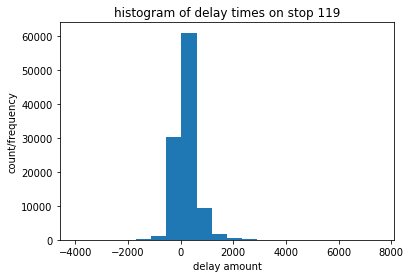

In [91]:
plt.hist(stop_119_pd_df["delay_amount"], bins = 20)
plt.title("histogram of delay times on stop 119")
plt.ylabel("count/frequency")
plt.xlabel("delay amount")
plt.show()

In [139]:
# train test split with respect to time
train_df = stop_119_pd_df[stop_119_pd_df["time_proportion"] <= 0.7]
test_df = stop_119_pd_df[stop_119_pd_df["time_proportion"] > 0.7]

In [140]:
# get the target and the training features
train_target = train_df["delay_amount"]
test_target = test_df["delay_amount"]
training = train_df[["PROGRNUMBER", "planned_arr_hours", "planned_arr_minutes", "holiday",  "DIRECTION"]]
testing = test_df[["PROGRNUMBER", "planned_arr_hours", "planned_arr_minutes", "holiday",  "DIRECTION"]]

In [141]:
loaded_encoder = joblib.load("models/days_of_week_one_hot_encoder.sav")

In [142]:
# if we one hot encode the days of the week
train_days = loaded_encoder.transform(train_df["day_of_week"].values.reshape(-1,1))
test_days = loaded_encoder.transform(test_df["day_of_week"].values.reshape(-1,1))

In [143]:
# training the model
design_matrix_1 = np.concatenate((training.values, train_days.toarray()), axis = 1)
test_matrix_1 = np.concatenate((testing.values, test_days.toarray()), axis = 1)

# training the model
stop_119_rf = RandomForestRegressor(n_estimators = 100,max_depth = 5, n_jobs = -1)
stop_119_rf.fit(design_matrix_1, train_target)

RandomForestRegressor(max_depth=5, n_jobs=-1)

In [144]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [145]:
# testiung the model
predicted_values =  stop_119_rf.predict(test_matrix_1)
mae_error = mean_absolute_error(test_target, predicted_values)
print(mae_error)

264.1720511470554


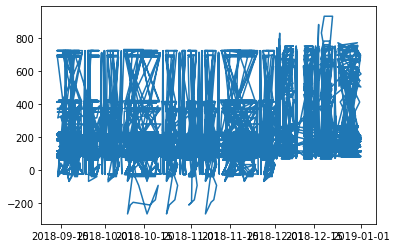

In [149]:
plt.plot(test_df["datetime_exact"], predicted_values)
plt.show()

In [107]:
mse_error = mean_squared_error(test_target, predicted_values, squared = False)
print(mse_error)

403.3817518595324


In [110]:
# outliers for the target, 30 minutes is decent ourlier, any larger, its scary
no_outlier_train = train_df[abs(train_df["delay_amount"]) < 1800 ].reset_index(drop=True)

# get the target and the training features
train_target = no_outlier_train["delay_amount"]
test_target = test_df["delay_amount"]
training = no_outlier_train[["PROGRNUMBER", "planned_arr_hours", "planned_arr_minutes", "holiday",  "DIRECTION"]]
testing = test_df[["PROGRNUMBER", "planned_arr_hours", "planned_arr_minutes", "holiday",  "DIRECTION"]]

# if we one hot encode the days of the week
train_days = loaded_encoder.transform(no_outlier_train["day_of_week"].values.reshape(-1,1))
test_days = loaded_encoder.transform(test_df["day_of_week"].values.reshape(-1,1))

# training the model
design_matrix_1 = np.concatenate((training.values, train_days.toarray()), axis = 1)
test_matrix_1 = np.concatenate((testing.values, test_days.toarray()), axis = 1)

# training the model
stop_119_rf_no_out = RandomForestRegressor(n_estimators = 100,max_depth = 5, n_jobs = -1)
stop_119_rf_no_out.fit(design_matrix_1, train_target)

RandomForestRegressor(max_depth=5, n_jobs=-1)

In [118]:
# testiung the model
predicted_values =  stop_119_rf_no_out.predict(test_matrix_1)
mae_error = mean_absolute_error(test_target, predicted_values)
print(mae_error)

264.2399686485842


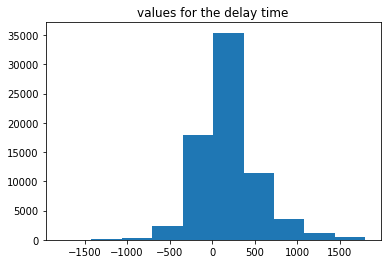

In [119]:
plt.hist(train_target)
plt.title("values for the delay time")
plt.show()

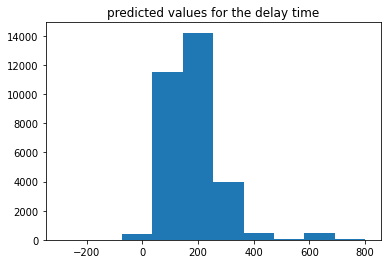

In [121]:
plt.hist(predicted_values)
plt.title("predicted values for the delay time")
plt.show()

In [129]:
stop_35_df = big_df[big_df["STOPPOINTID"] == 35]

In [130]:
stop_35_pd_df = stop_35_df.compute()
stop_35_pd_df = stop_35_pd_df.reset_index(drop = True)

In [132]:
stop_35_pd_df = stop_35_pd_df.drop(["PASSENGERS", "PASSENGERSIN", "PASSENGERSOUT", "DISTANCE", "NOTE"], axis = 1)

stop_35_pd_df["DAYOFSERVICE"] = pd.to_datetime(stop_35_pd_df["DAYOFSERVICE"])
stop_35_pd_df["LASTUPDATE"] = pd.to_datetime(stop_35_pd_df["LASTUPDATE"])

# categorical things
stop_35_pd_df["TRIPID"] = stop_35_pd_df["TRIPID"].astype("category")
stop_35_pd_df["VEHICLEID"] = stop_35_pd_df["VEHICLEID"].astype("category")
stop_35_pd_df["SUPPRESSED"] = stop_35_pd_df["SUPPRESSED"].astype("category")
stop_35_pd_df["STOPPOINTID"] = stop_35_pd_df["STOPPOINTID"].astype("category")

# we need to merge the data for the route and the weather data
#merge with respect to the time, and eazch hour
# for example, 1:30 should be emrged with the data for 1:00 as weather
# is on hourly basis

# CREATE  a new feature in the routes that contains the hours so that we can 
# merge with the weather data
route_time_planned = stop_35_pd_df["PLANNEDTIME_ARR"]
route_time_actual = stop_35_pd_df["ACTUALTIME_ARR"]

actual_time_hour = []
expected_time_hour = []
for i in range(len(route_time_actual)):
    actual_time_hour.append(route_time_actual[i] // 3600)
    expected_time_hour.append(route_time_planned[i] // 3600)

actual_date = stop_35_pd_df["DAYOFSERVICE"]

# parse it into datetime with this  any hours
date_time = []
for i in range(len(actual_time_hour)):
    new_datetime = actual_date[i] + timedelta(hours = int(actual_time_hour[i]))
    date_time.append(new_datetime)
    
# add in the new column, 
# new column means that we can remove the other date column
stop_35_pd_df["date_and_time"] = date_time

stop_35_pd_df["delay_amount"] = stop_35_pd_df["ACTUALTIME_ARR"] - stop_35_pd_df["PLANNEDTIME_ARR"]

#combined_df["planned_hour_arr"]
hours = stop_35_pd_df["PLANNEDTIME_ARR"]//3600
#combined_df["planned_minute_arr"]

minutes= (stop_35_pd_df["PLANNEDTIME_ARR"]%3600) // 60

stop_35_pd_df["planned_arr_hours"] = hours
stop_35_pd_df["planned_arr_minutes"] = minutes
# get the day of the week form the 
stop_35_pd_df["day_of_week"] = stop_35_pd_df["DAYOFSERVICE"].dt.day_name()

stop_35_pd_df["holiday"] = stop_35_pd_df.apply(holiday, axis = 1)

stop_35_pd_df[ "datetime_exact"] = stop_35_pd_df["DAYOFSERVICE"] + pd.Series(map(seconds_to_time, stop_35_pd_df["PLANNEDTIME_ARR"]), name="time")

stop_35_pd_df = pd.merge(stop_35_pd_df ,trips_direction_df ) 

stop_35_pd_df = stop_35_pd_df.drop_duplicates(["TRIPID", "DAYOFSERVICE"]).reset_index(drop=True)

stop_35_pd_df["time_proportion"] = (stop_35_pd_df["datetime_exact"] - min(stop_35_pd_df["datetime_exact"]))/(max(stop_35_pd_df["datetime_exact"])- min(stop_35_pd_df["datetime_exact"]))






In [136]:
# train test split with respect to time
train35_df = stop_35_pd_df[stop_35_pd_df["time_proportion"] <= 0.7]
test35_df = stop_35_pd_df[stop_35_pd_df["time_proportion"] > 0.7]

# get the target and the training features
# train_target = train35_df["delay_amount"]
# test_target = test_df["delay_amount"]
# training = train35_df[["PROGRNUMBER", "planned_arr_hours", "planned_arr_minutes", "holiday",  "DIRECTION"]]
# testing = test_df[["PROGRNUMBER", "planned_arr_hours", "planned_arr_minutes", "holiday",  "DIRECTION"]]





# outliers for the target, 30 minutes is decent ourlier, any larger, its scary
no_outlier_train = train35_df[abs(train35_df["delay_amount"]) < 1800 ].reset_index(drop=True)

# get the target and the training features
train_target = no_outlier_train["delay_amount"]
test_target = test35_df["delay_amount"]
training = no_outlier_train[["PROGRNUMBER", "planned_arr_hours", "planned_arr_minutes", "holiday",  "DIRECTION"]]
testing = test35_df[["PROGRNUMBER", "planned_arr_hours", "planned_arr_minutes", "holiday",  "DIRECTION"]]

# if we one hot encode the days of the week
train_days = loaded_encoder.transform(no_outlier_train["day_of_week"].values.reshape(-1,1))
test_days = loaded_encoder.transform(test35_df["day_of_week"].values.reshape(-1,1))

# training the model
design_matrix_1 = np.concatenate((training.values, train_days.toarray()), axis = 1)
test_matrix_1 = np.concatenate((testing.values, test_days.toarray()), axis = 1)

# training the model
stop_35_rf_no_out = RandomForestRegressor(n_estimators = 100,max_depth = 5, n_jobs = -1)
stop_35_rf_no_out.fit(design_matrix_1, train_target)










RandomForestRegressor(max_depth=5, n_jobs=-1)

In [137]:
# testiung the model
predicted_values =  stop_35_rf_no_out.predict(test_matrix_1)
mae_error = mean_absolute_error(test_target, predicted_values)
print(mae_error)

65.05788998971191


In [138]:
stop_35_pd_df.shape

(12680, 22)